In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('UpdatedResumeDataSet.csv')

In [39]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [40]:
data.shape

(962, 2)

In [41]:
data['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [42]:
category_counts = data['Category'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_8196\3819279049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


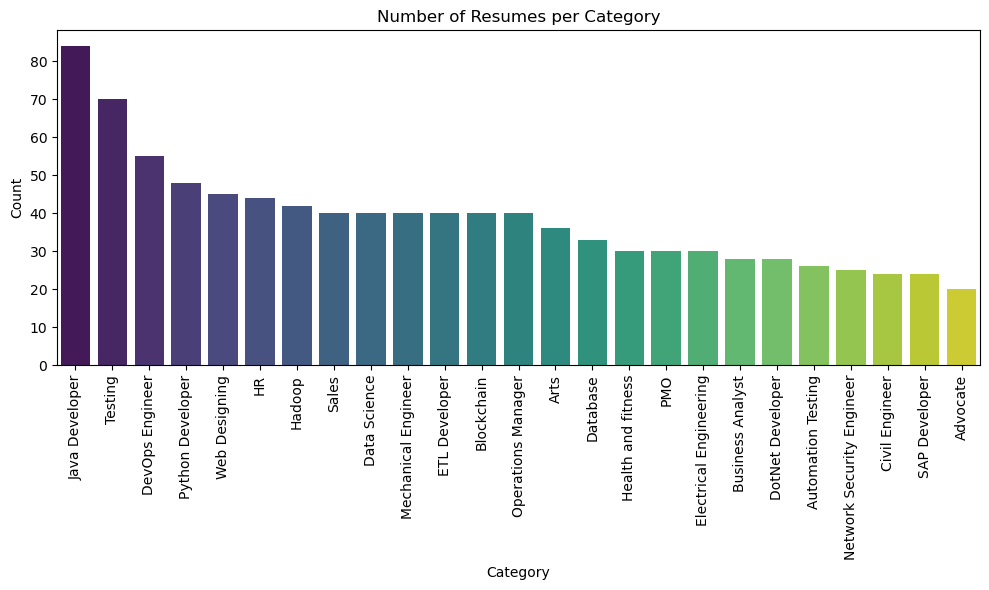

In [43]:
## Visualizing the category section in terms of a graph
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Resumes per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [44]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [45]:
job_title = data['Category'].unique()

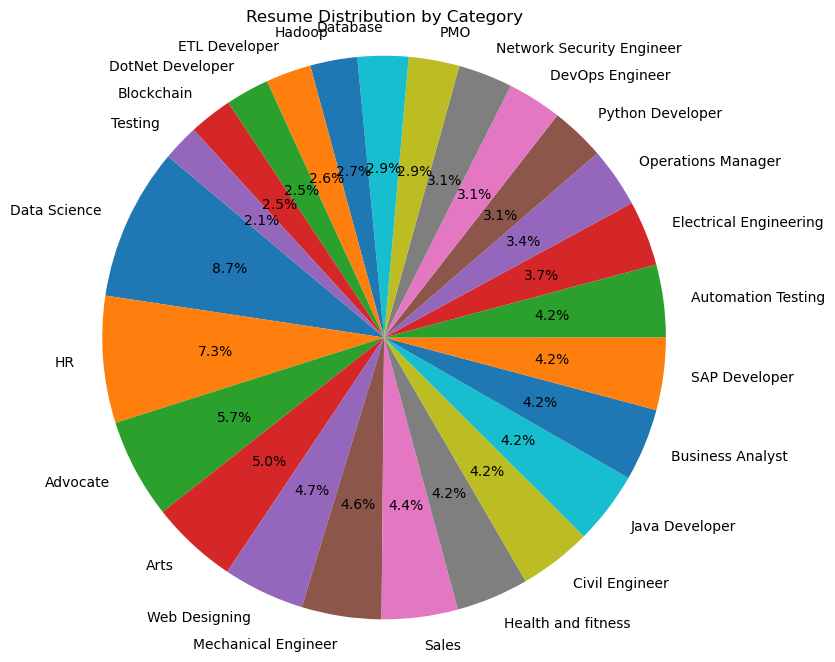

In [46]:
# Plot the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the pie chart
plt.pie(category_counts, labels=job_title, autopct='%1.1f%%', startangle=140)
plt.title('Resume Distribution by Category')
plt.axis('equal')  # Makes sure pie is drawn as a circle
plt.show()

In [47]:
data['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [48]:
import re
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a preprocessing function
def clean_resume(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove @ and #
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
data['Cleaned_Resume'] = data['Resume'].apply(clean_resume)

In [50]:
data['Cleaned_Resume'][0]

'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch djs dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run analytics gene

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Fit and transform the 'Category' column
data['Category'] = le.fit_transform(data['Category'])

In [52]:
data.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create the vectorizer
tfidf = TfidfVectorizer(stop_words='english')  # You can increase max_features for better results
# Fit and transform the cleaned resumes
X = tfidf.fit_transform(data['Cleaned_Resume'])
# Check the shape
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (962, 7488)


In [54]:
from sklearn.model_selection import train_test_split
# Features (resume vectors) and Labels (categories)
X = tfidf.fit_transform(data['Cleaned_Resume'])  # already covered
y = data['Category']  # encoded categories
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Check sizes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (673, 7488)
Test shape: (289, 7488)


In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
y_pred = svm_model.predict(X_test)

In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9930795847750865
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       0.97      1.00      0.98        28
          16       1.00     

In [64]:
# Step 7: Take user input for prediction
print("\n🔍 Predict the category of a new resume:")
user_resume = input("Paste the resume text here:\n")
# Step 8: Transform and predict
user_vector = tfidf.transform([user_resume])
predicted_encoded= svm_model.predict(user_vector)
predicted_label = le.inverse_transform(predicted_encoded)
print("\n🧠 Predicted Resume Category:", predicted_label[0])


🔍 Predict the category of a new resume:


Paste the resume text here:
 Skilled in SQL, Python, and data visualization with Power BI. Experience in analyzing business metrics and generating reports.



🧠 Predicted Resume Category: Data Science


In [65]:
import pickle

In [66]:
# Save the trained model
pickle.dump(svm_model, open('svm_model.pkl','wb'))

# Save the TF-IDF vectorizer
pickle.dump(tfidf,open('tfidf.pkl','wb'))


In [68]:
# Save the LabelEncoder
with open("label_encoder.pkl", "wb") as encoder_file:
    pickle.dump(le, encoder_file)